### Effect of bed on glacier length

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from glacier_read_data import *

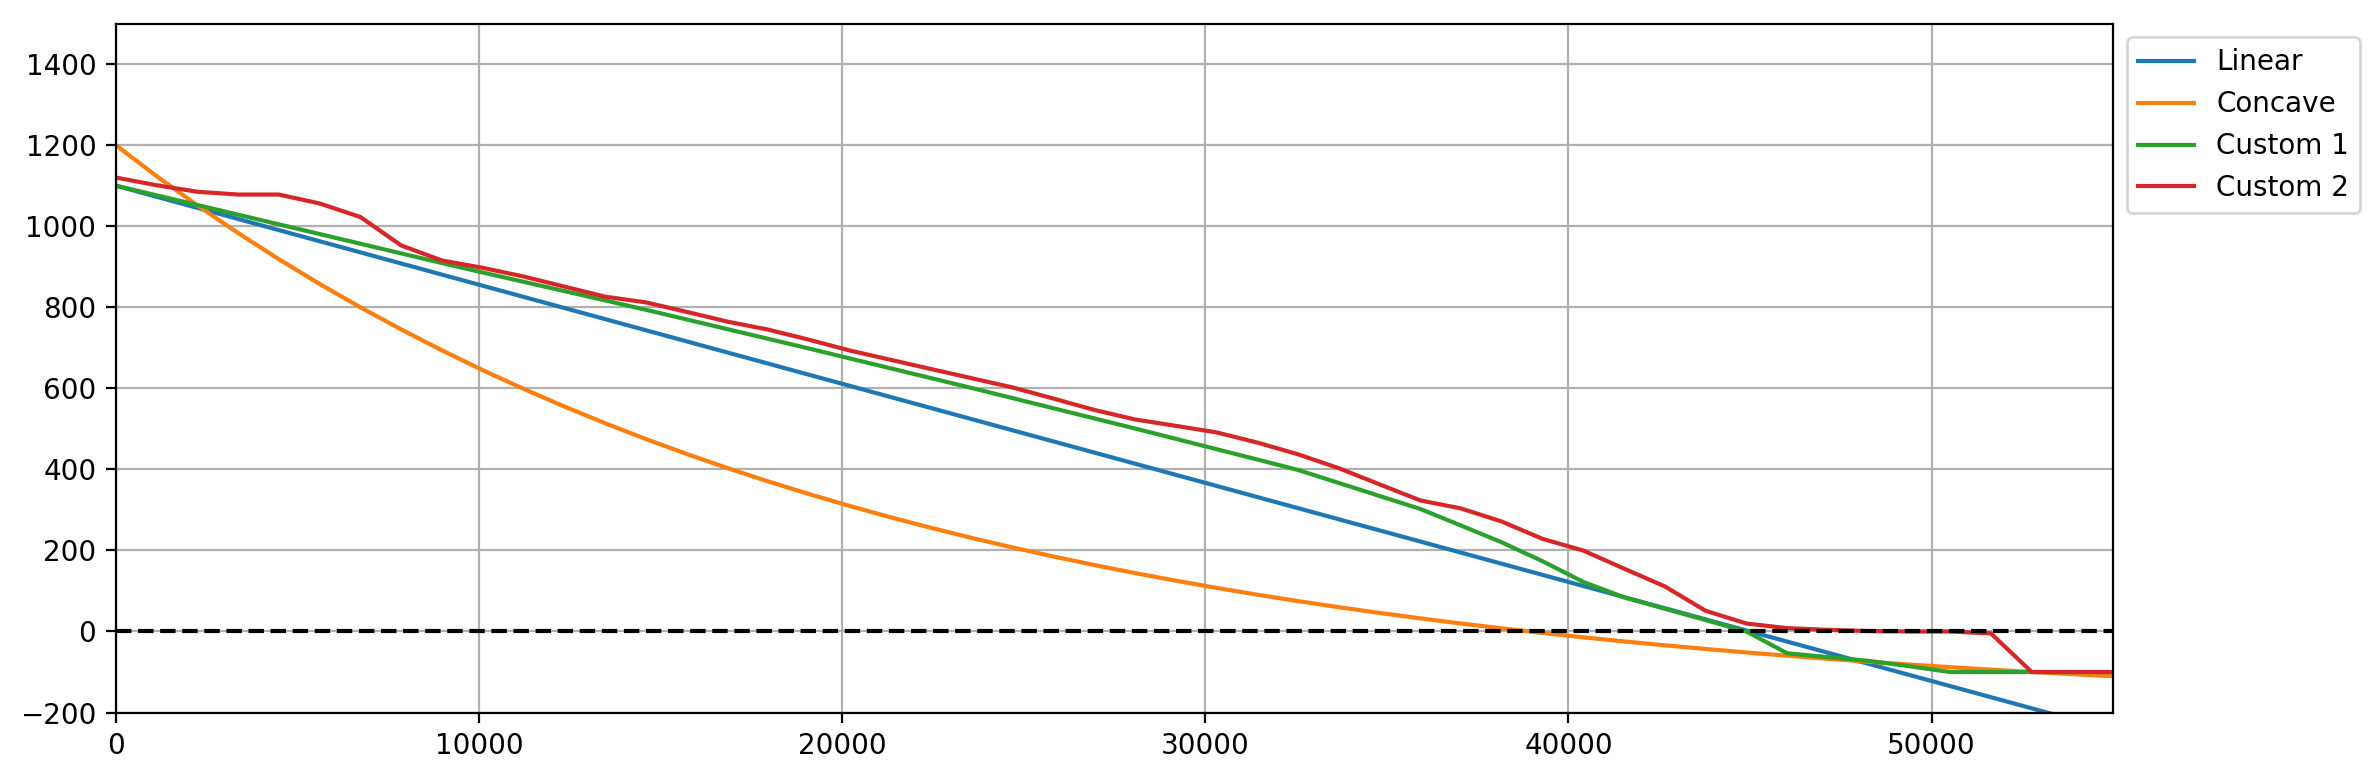

In [12]:
[y1,x1] = np.genfromtxt("bed_data_01.txt", delimiter=", ")
[y2,x2] = np.genfromtxt("bed_data_02.txt", delimiter=", ")

x1 = np.append(x1, 52000)
y1 = np.append(y1, -100.)
x2 = np.append(x2, 52000)
y2 = np.append(y2, -100.)

A = LinearBedModel(b0=1100., s=1100./45000., L0=25000)
B = ConcaveBedModel(ba=-200., b0=1400., xl=20000., L0=25000)
C = CustomBedModel(x1, y1, L0=25000)
D = CustomBedModel(x2, y2, L0=25000)

x = np.linspace(0, 55000)

plt.figure(figsize=(12,4), dpi=200)
plt.plot(x, A.bed(x), label="Linear")
plt.plot(x, B.bed(x), label="Concave")
plt.plot(x, C.bed(x), label="Custom 1")
plt.plot(x, D.bed(x), label="Custom 2")
plt.plot(x, [0]*len(x), "--k")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-200, 1500])
plt.tight_layout()
plt.show()

glaciers = [A,B,C,D]

In [13]:
t = 500.
dt = 0.2

for glacier in glaciers:
    print(glacier)
    glacier.E = 800
    glacier.integrate(dt, t)
    glacier.E = 700
    glacier.integrate(dt, t)
    glacier.E = 800
    glacier.integrate(dt, t)

Minimum Glacier Model for a linear bed.
Minimum Glacier Model for a concave bed.
Minimum Glacier Model for a custom bed.
Minimum Glacier Model for a custom bed.


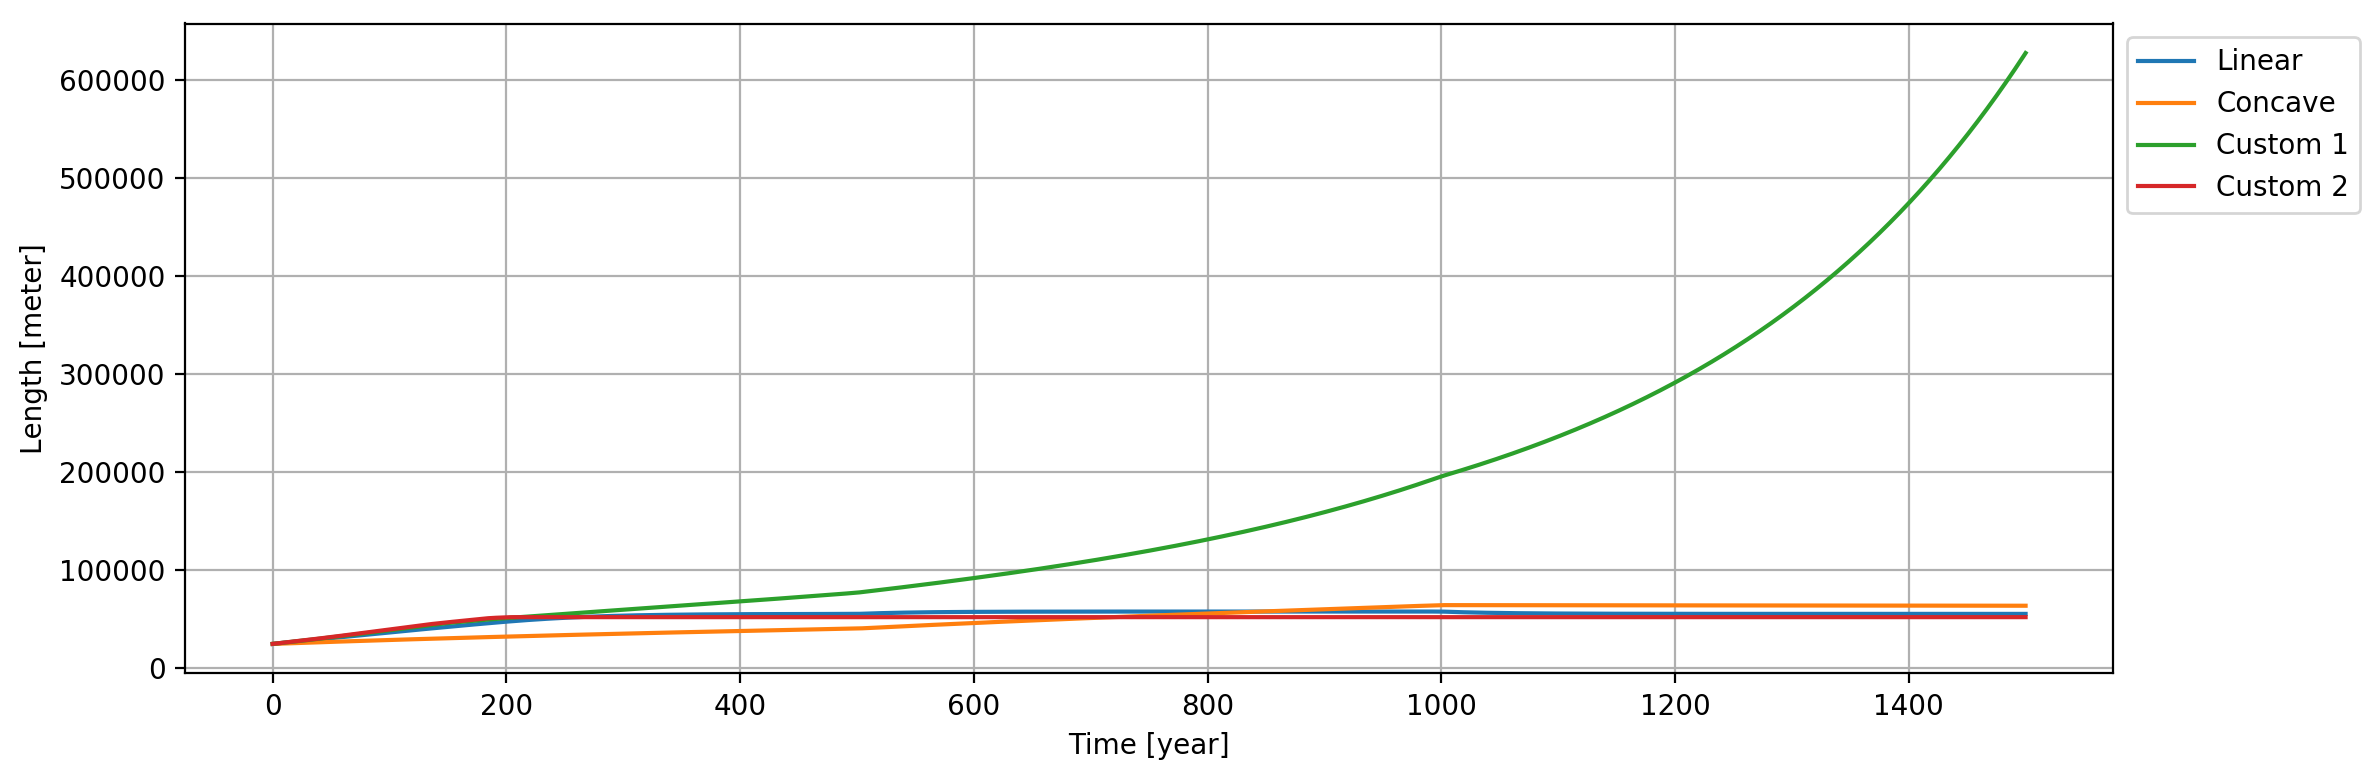

In [14]:
plt.figure(figsize=(12,4), dpi=200)   

plt.plot(A.t, A.L, label="Linear")
plt.plot(B.t, B.L, label="Concave")
plt.plot(C.t, C.L, label="Custom 1")
plt.plot(D.t, D.L, label="Custom 2")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
# plt.ylim(0, 75000)
plt.show()